In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import cv2
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from xml.dom import minidom

In [2]:
df = pd.read_csv("../data/ypr_df.csv", sep=";")

In [3]:
df["mouth_landmarks"] = df.mouth_landmarks.apply(lambda x: literal_eval(x))

In [4]:
for detection_type in ["object", "shape"]:

    root = minidom.Document()

    images = root.createElement('images')
    dataset = root.createElement('dataset')
    root.appendChild(dataset)

    for row in tqdm(df.itertuples()):
        img = cv2.imread(f"../data/cropped_images/{row.name}")
        img_height, img_width = img.shape[:2]
        mouth_landmarks = np.array(row.mouth_landmarks).astype(np.uint32)
        left, top = mouth_landmarks.min(axis=0)-20
        right, bottom = mouth_landmarks.max(axis=0)+20
        mouth_width, mouth_height = right-left, bottom-top

        image = root.createElement('image')
        image.setAttribute('file', row.name)
        image.setAttribute('width', f'{img_width}')
        image.setAttribute('height', f'{img_height}')
        box = root.createElement('box')
        box.setAttribute('top', f'{top}')
        box.setAttribute('left', f'{left}')
        box.setAttribute('width', f'{mouth_width}')
        box.setAttribute('height', f'{mouth_height}')
        if detection_type == "shape":
            for landmark_idx, landmark_coords in enumerate(row.mouth_landmarks):
                part = root.createElement('part')
                part_name = f"{landmark_idx}" if landmark_idx>=10 else f"0{landmark_idx}"
                part.setAttribute('name', part_name)
                part.setAttribute('x', f'{mouth_landmarks[landmark_idx][1]}')
                part.setAttribute('y', f'{mouth_landmarks[landmark_idx][1]}')
                box.appendChild(part)
        image.appendChild(box)
        images.appendChild(image)

        # break

    dataset.appendChild(images)

    xml_str = root.toprettyxml()

    with open(f"../data/cropped_images/training_mouth_{detection_type}_detection.xml", "w") as f:
        f.write(xml_str)

7674it [00:10, 732.43it/s]
7674it [00:13, 574.47it/s]


In [5]:
for i, (x, y) in enumerate(mouth_landmarks):
    cv2.circle(img, (x, y), 1, (0, 255, 255), -1)

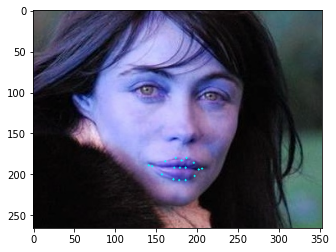

In [6]:
plt.imshow(img)

In [7]:
top, bottom, left, right, mouth_width, mouth_height

(160, 227, 121, 226, 105, 67)

In [8]:
top, bottom = np.array(df.mouth_landmarks.values[0])[..., 1].min()-20, np.array(df.mouth_landmarks.values[0])[..., 1].max()+20
left, right = np.array(df.mouth_landmarks.values[0])[..., 0].min()-20, np.array(df.mouth_landmarks.values[0])[..., 0].max()+20

In [9]:
top, bottom, left, right

(146.4500911764706, 211.17877794117652, 137.85751617647054, 242.5200161764705)

In [10]:
mouth_landmarks = np.array(df.mouth_landmarks.values[0]).astype(np.uint32)
left, top = mouth_landmarks.min(axis=0)-20
right, bottom = mouth_landmarks.max(axis=0)+20
width, height = right-left, bottom-top

In [11]:
top, bottom, left, right, width, height

(146, 211, 137, 242, 105, 65)